# Problem 1

### b) Use the inverse transform method to generate a random sample of size 1000 from the distribution of X.

In [14]:
n = 1000 
u = runif(n)

p = c(0.1, 0.2, 0.2, 0.2, 0.3)
x = 0:4
Fx = cumsum(p)

sample_inverse <- function(u){
    min(x[u<=Fx])
}

In [15]:
#the sapply-function that applies a function on each element of a list or vector 
#and returns the result a vector or a matrix. 
sample1 = sapply(u, sample_inverse)

### c) Construct a relative frequency table and compare the empirical distribution of your sample with the theoretical probabilities

In [17]:
rel_freq = table(sample1)/n

In [18]:
rel_freq

sample1
    0     1     2     3     4 
0.105 0.204 0.195 0.219 0.277 

In [19]:
round(rbind(rel_freq, p), 3)

,0,1,2,3,4
rel_freq,0.105,0.204,0.195,0.219,0.277
p,0.100,0.200,0.200,0.200,0.300


### d) Generate another sample of size 1000 from the distribution of X by using the sample function and plot a histogram of this sample.

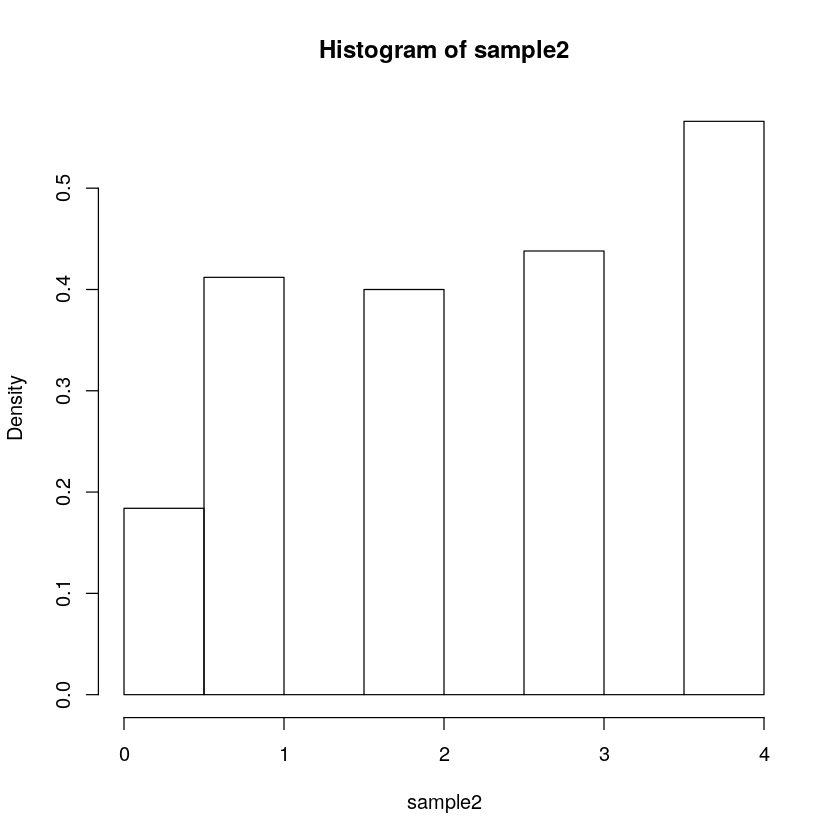

In [20]:
sample2 <- sample(x, 1000, replace = TRUE, p)
hist(sample2, probability = TRUE)

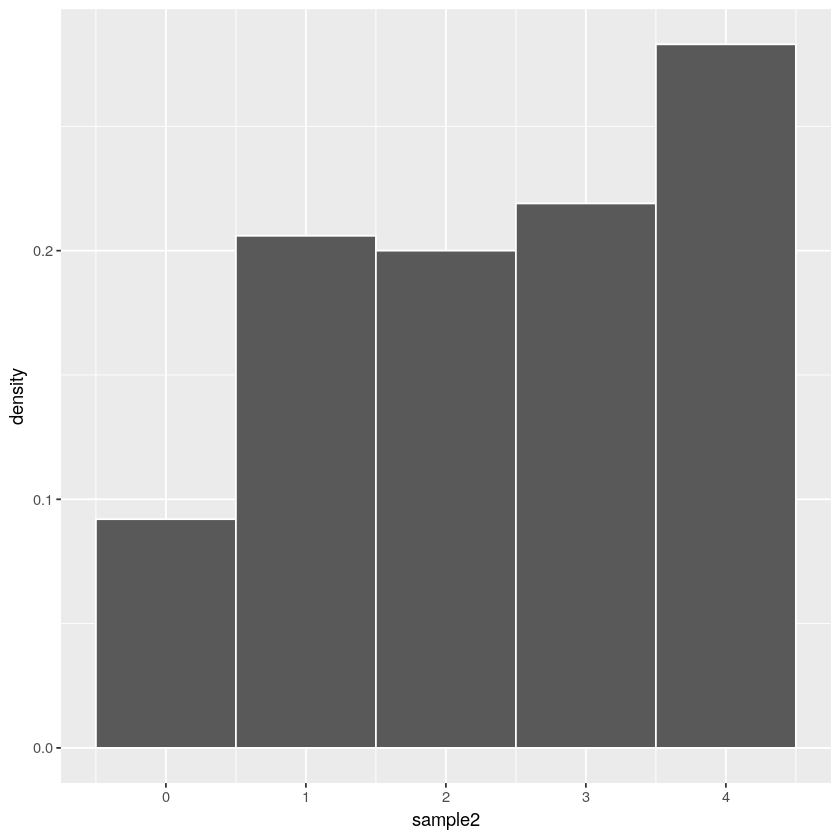

In [21]:
library(ggplot2)

ggplot(data = data.frame(sample2), mapping = aes(x = sample2, y = stat(density))) +
geom_histogram(binwidth = 1, color = "white")

# Problem 2

### b) The algorithm to simulate n samples from a Rayleigh(σ) distribution can be implemented as follows. Note that if U ∼ U(0, 1), then U and 1 − U have the same distribution.

In [26]:
rayleigh <- function(n, sigma){
# Generate n uniform distributed variables
u <- runif(n)
x <- sigma * sqrt(-2 * log(1-u))
}

### c) Generate 1000 Rayleigh(σ) samples for σ = 0.5, 1, 2, 4 and plot the density estimate using the R function geom_density from ggplot2. How does the parameter σ influence the shape of the histogram?

In [27]:
n <- 1000
sigmas <- c(0.5, 1, 2, 4)
set.seed(300)
rayleigh_samples <- lapply(sigmas, function(x) rayleigh(n, x))

In [28]:
rayleigh_data = data.frame(sigma = rep(sigmas, each = n),
rayleigh = unlist(rayleigh_samples))

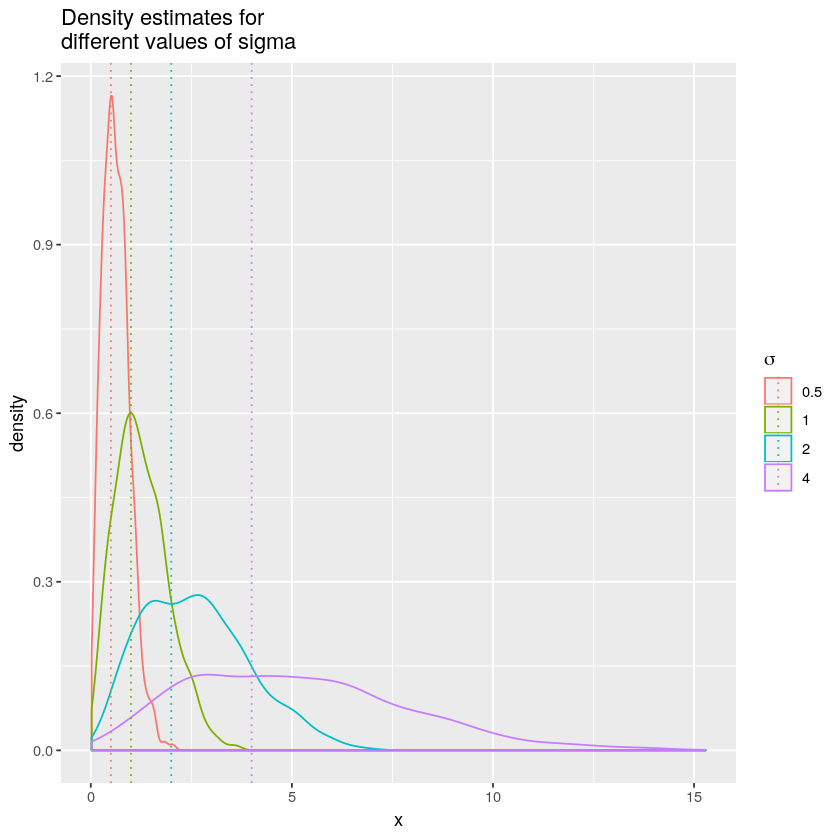

In [29]:
ggplot(rayleigh_data, aes(x = rayleigh, color = factor(sigma))) +
# Add density
geom_density() +
# Add vertical lines corresponding to sigma
geom_vline(aes(xintercept = sigma, color = factor(sigma)),
linetype = "dotted") +
# Change labels
labs(title = "Density estimates for\ndifferent values of sigma", x = "x",
color = expression(sigma))

# Problem 3

### a) Develop and write out an acceptance rejection algorithm specifically for a Beta(2,5)-distribution.

In [57]:
n = 1000 # sample size
k <- 0 # counter for accepted
j <- 0 # iterations
x <- numeric(n) # vector to store samples
while (k < n) {
    u <- runif(1)
    j <- j + 1
    y <- runif(1)
    if (12 * y * (1 - y)^4 > u) {
        k <- k + 1
        x[k] <- y
    }
}

In [58]:
j

[1] 2490

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


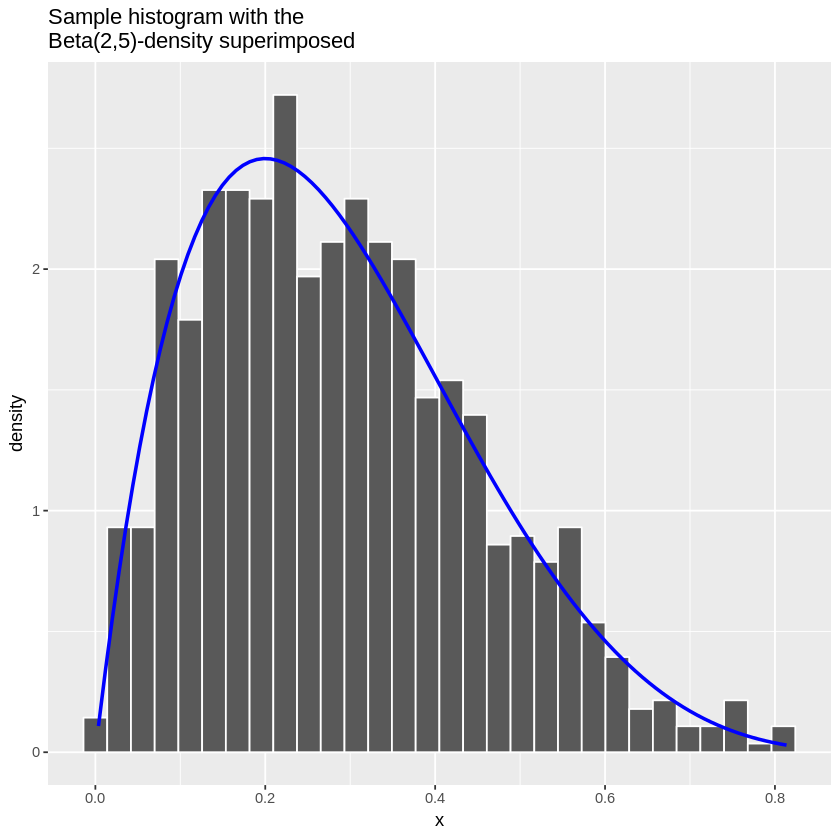

In [67]:
ggplot(data.frame(x), aes(x)) +
    geom_histogram(aes(y = stat(density)), color = "white") +
    ggtitle("Sample histogram with the \nBeta(2,5)-density superimposed") +
    stat_function(fun = dbeta,
        # Specify arguments for dbeta with args = list(...)
        args = list(shape1 = 2, shape2 = 5),
        color = "blue", size = 1)